In [71]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [26]:
loss_list = np.load('mnist_result/loss_list.npy')
val_loss_list = np.load('mnist_result/val_loss_list.npy')
val_acc_list = np.load('mnist_result/val_acc_list.npy')

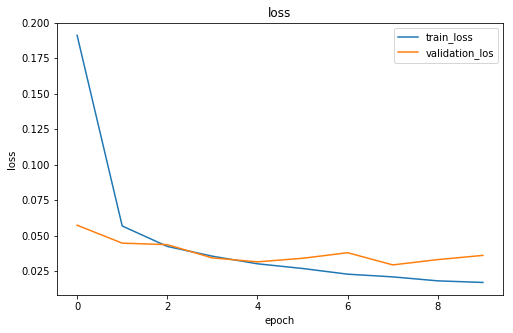

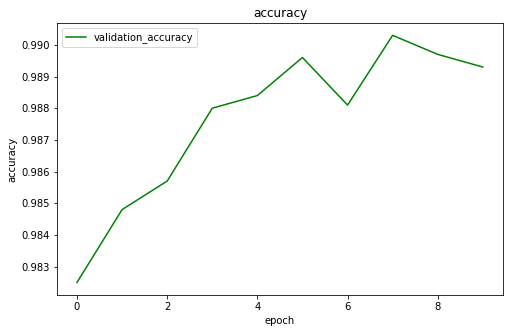

In [27]:
plt.figure(figsize=(8,5))
plt.plot(loss_list, label = 'train_loss')
plt.plot(val_loss_list, label = 'validation_los')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(val_acc_list, 'g-',label='validation_accuracy')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
# 畳み込みニューラルネットワーク（MNIST用）
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.layers1 = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size = 5, padding = 2),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.layers2 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size = 5, padding = 2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.fc = nn.Linear(7 * 7 * 16, 10)
        
    def forward(self, x):
        out = self.layers1(x)
        out = self.layers2(out)
        out = out.view(out.size()[0], -1)
        out = self.fc(out)
        return out

In [49]:
params = torch.load('mnist_result/CNN_MNIST.pth', map_location = 'cpu')
net = CNN_MNIST()
net.load_state_dict(params)

In [69]:
tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
mnist_test = datasets.MNIST(root = './data',
                            train = False,
                            transform = tf)
mnist_test_loader = DataLoader(mnist_test, batch_size = len(mnist_test), shuffle = False)

In [70]:
inputs, targets = iter(mnist_test_loader).next()
outputs = net(inputs)
_, preds = torch.max(outputs, 1)
accuracy = (preds == targets).float().sum() / targets.size(0)
print(accuracy)

tensor(0.9900)


tensor([[7, 2, 1, 0, 4],
        [1, 4, 9, 5, 9],
        [0, 6, 9, 0, 1],
        [5, 9, 7, 3, 4],
        [9, 6, 6, 5, 4]])


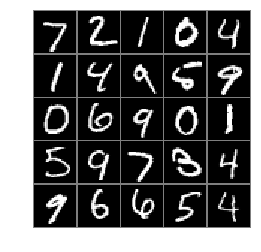

In [72]:
# データの可視化
def imshow(img):
    npimg = img.numpy() * 0.5 + 0.5
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
n_show = 25
n_row = 5
images, labels = inputs[:n_show], preds[:n_show]
imshow(make_grid(images, nrow = n_row, padding = 1))
plt.axis('off')
print(labels.view(-1, n_row))